In [14]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


breast = load_breast_cancer()
breast_data = breast.data
breast_labels = breast.target
labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)
print(final_breast_data.shape)
breast_dataset = pd.DataFrame(final_breast_data)
features = breast.feature_names
features_labels = np.append(features,'label')
breast_dataset.columns = features_labels
breast_dataset['label'].replace(0, 'Benign',inplace=True)
breast_dataset['label'].replace(1, 'Malignant',inplace=True)
print(breast_dataset)

(569, 31)
     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave p

     feature0  feature1  feature2  feature3  feature4  feature5  feature6  \
0    1.097064 -2.073335  1.269934  0.984375  1.568466  3.283515  2.652874   
1    1.829821 -0.353632  1.685955  1.908708 -0.826962 -0.487072 -0.023846   
2    1.579888  0.456187  1.566503  1.558884  0.942210  1.052926  1.363478   
3   -0.768909  0.253732 -0.592687 -0.764464  3.283553  3.402909  1.915897   
4    1.750297 -1.151816  1.776573  1.826229  0.280372  0.539340  1.371011   
..        ...       ...       ...       ...       ...       ...       ...   
564  2.110995  0.721473  2.060786  2.343856  1.041842  0.219060  1.947285   
565  1.704854  2.085134  1.615931  1.723842  0.102458 -0.017833  0.693043   
566  0.702284  2.045574  0.672676  0.577953 -0.840484 -0.038680  0.046588   
567  1.838341  2.336457  1.982524  1.735218  1.525767  3.272144  3.296944   
568 -1.808401  1.221792 -1.814389 -1.347789 -3.112085 -1.150752 -1.114873   

     feature7  feature8  feature9  ...  feature20  feature21  feature22  \


<Figure size 432x288 with 0 Axes>

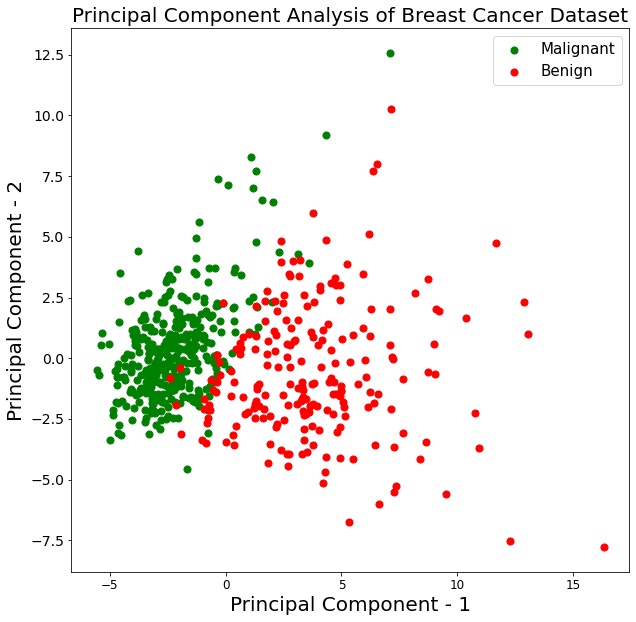

In [15]:
from sklearn.preprocessing import StandardScaler
x = breast_dataset.loc[:, features].values
x = StandardScaler().fit_transform(x) # normalizing the features
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_breast = pd.DataFrame(x,columns=feat_cols)
print(normalised_breast)

from sklearn.decomposition import PCA
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(x)
principal_breast_Df = pd.DataFrame(data = principalComponents_breast
             , columns = ['principal component 1', 'principal component 2'])
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Malignant', 'Benign']
colors = ['g', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 1']
               , principal_breast_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})


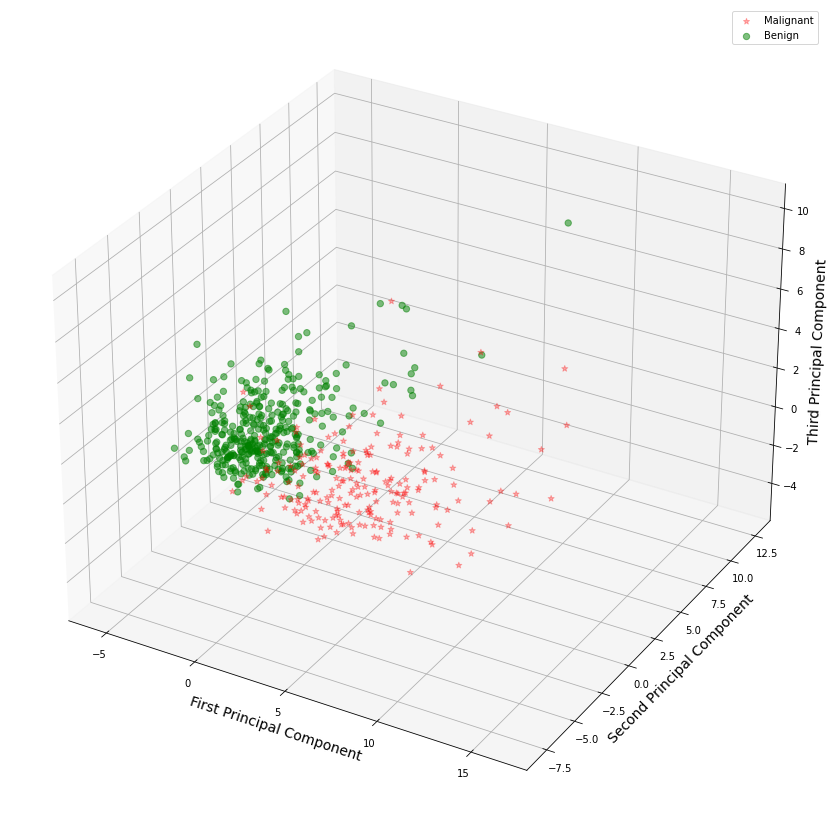

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
# %matplotlib notebook

data = load_breast_cancer()
X = data.data
y = data.target
sc = StandardScaler()

scaler = StandardScaler()
scaler.fit(X) 
X_scaled = scaler.transform(X)

pca = PCA(n_components=3)
pca.fit(X_scaled) 
X_pca = pca.transform(X_scaled) 

ex_variance=np.var(X_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
ex_variance_ratio


Xax = X_pca[:,0]
Yax = X_pca[:,1]
Zax = X_pca[:,2]

cdict = {0:'red',1:'green'}
labl = {0:'Malignant',1:'Benign'}
marker = {0:'*',1:'o'}
alpha = {0:.3, 1:.5}

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111, projection='3d')

fig.patch.set_facecolor('white')
for l in np.unique(y):
 ix=np.where(y==l)
 ax.scatter(Xax[ix], Yax[ix], Zax[ix], c=cdict[l], s=40,
           label=labl[l], marker=marker[l], alpha=alpha[l])
# for loop ends
ax.set_xlabel("First Principal Component", fontsize=14)
ax.set_ylabel("Second Principal Component", fontsize=14)
ax.set_zlabel("Third Principal Component", fontsize=14)

ax.legend()
plt.show()
